In [1]:
data_file_path = '/content/drive/My Drive/Colab Notebooks/datasets/jena_climate_2009_2016.csv'

In [2]:
f = open(data_file_path)
data = f.read()
f.close()

In [5]:
data_lines = data.split('\n')

In [6]:
header = data_lines[0].split(',')

In [7]:
header

['"Date Time"',
 '"p (mbar)"',
 '"T (degC)"',
 '"Tpot (K)"',
 '"Tdew (degC)"',
 '"rh (%)"',
 '"VPmax (mbar)"',
 '"VPact (mbar)"',
 '"VPdef (mbar)"',
 '"sh (g/kg)"',
 '"H2OC (mmol/mol)"',
 '"rho (g/m**3)"',
 '"wv (m/s)"',
 '"max. wv (m/s)"',
 '"wd (deg)"']

In [8]:
data_lines = data_lines[1:]

In [9]:
import numpy as np

In [13]:
float_data = np.zeros((len(data_lines), len(header) - 1))
for idx, line in enumerate(data_lines):
  value = [float(x) for x in line.split(',')[1:]]
  float_data[idx, :] = value

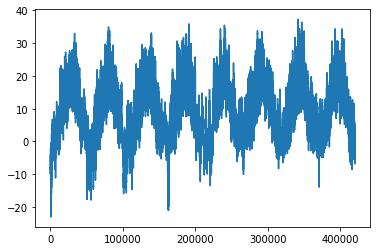

In [17]:
import matplotlib.pyplot as plt

temperature = float_data[:,1]
plt.plot(range(len(temperature)), temperature)

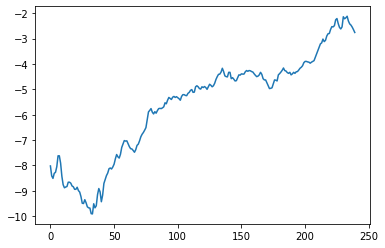

In [19]:
plt.plot(range(10 * 24 ), temperature[:10*24])

In [21]:

mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

float_data

In [ ]:
Ulim = 202000
Llim = 200000
SamSize = Ulim - Llim

plt.plot(range(SamSize), temp[Llim:Ulim], 'r')

In [ ]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets